In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ast import literal_eval

In [2]:
# Read in survey data
survey_results_in = pd.read_csv('data/clean/survey_results.csv')
survey_results_in.head()

,ResponseId,CodingStatus,AgeRange,EducationLevel,Country,DevType,Employment,Industry,CodingActivities,YearsCoding,...,YearsWorkExperience,HowLearnCode,HowLearnCodeOnline,LanguagesUsedPastYear,DatabasesUsedPastYear,CloudPlatformsUsedPastYear,WebFrameworksUsedPastYear,Currency,CompTotal,ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,Primary/elementary school,United States of America,NaN,"['Employed, full-time']",NaN,['Hobby'],NaN,...,NaN,['Books / Physical media'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United Kingdom of Great Britain and Northern I...,"Developer, full-stack","['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",20,...,17.0,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...","['Bash/Shell (all shells)', 'Go', 'HTML/CSS', ...","['Dynamodb', 'MongoDB', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Heroku', 'Netli...","['Express', 'Next.js', 'Node.js', 'React']",NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,Developer Experience,"['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",37,...,NaN,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...",['C#'],['Firebase Realtime Database'],['Google Cloud'],['ASP.NET CORE'],NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,Some college/university study without earning ...,Canada,"Developer, full-stack","['Student, full-time']",NaN,NaN,4,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Stack Overflow', 'How-to videos', 'Interacti...","['C', 'C++', 'HTML/CSS', 'Java', 'JavaScript',...","['MongoDB', 'MySQL', 'PostgreSQL', 'SQLite']","['Amazon Web Services (AWS)', 'Fly.io', 'Heroku']","['jQuery', 'Next.js', 'Node.js', 'React', 'Wor...",NaN,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Secondary school (e.g. American high school, G...",Norway,"Developer, full-stack","['Student, full-time']",NaN,NaN,9,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Technical documentation', 'Blogs', 'Written ...","['C++', 'HTML/CSS', 'JavaScript', 'Lua', 'Pyth...","['PostgreSQL', 'SQLite']",NaN,NaN,NaN,NaN,NaN


In [3]:
# Read in MOOC data
moocs_in = pd.read_csv('combined_mooc.csv', dtype={
    'organization': 'string',
    'level': 'string',
    'reviews': 'string'
})
moocs_in.head()

,type,course_name,organization,rating,description,skills,level,duration,reviews,enrollments,subject,provider,language,reviews_comments,reviews_stars,reviews_avg_stars,num_reviews,premium
0,course,AWS Lambda إنشاء صورة مصغرة بإستخدام السيرفرل...,Coursera Project Network,NaN,هذا المشروع التفاعلي -إنشاء صورة مصغرة بإستخدا...,"['AWS Identity And Access Management (IAM)', '...",Intermediate,2.0,<NA>,NaN,NaN,coursera,ar,NaN,NaN,NaN,NaN,NaN
1,course,Assisting Public Sector Decision Makers With ...,University of Michigan,4.8,Develop data analysis skills that support publ...,"['Simulations', 'Statistical Analysis', 'Predi...",Intermediate,16.0,[{'comment': 'This course was very good at get...,NaN,NaN,coursera,en,['wonderful'],[5],5.0,1.0,NaN
2,course,Advanced Strategies for Sustainable Business,University of Colorado Boulder,NaN,This course focuses on integrating sustainabil...,"['Circular Economy', 'Sustainable Business', '...",Beginner,6.0,<NA>,NaN,NaN,coursera,en,NaN,NaN,NaN,NaN,NaN
3,course,Applying Machine Learning to Your Data with G...,Google Cloud,NaN,"Dans ce cours, nous définirons ce qu'est le ma...",NaN,Beginner,10.0,<NA>,NaN,NaN,coursera,fr,NaN,NaN,NaN,NaN,NaN
4,project,Automate Blog Advertisements with Zapier,Coursera Project Network,NaN,Zapier is the industry leader in task automati...,"['Advertising', 'Social Media', 'Blogging', 'M...",Intermediate,2.0,"[{'comment': 'wonderful', 'stars': 5}]",NaN,NaN,coursera,en,"['Very good way of teaching.', 'Good', 'Good']","[5, 5, 5]",5.0,3.0,NaN


# Question 1: Are the most popular skills in MOOC educational content the same skills that are most widely used according to the survey?

For each skill in the survey, calculate a “popularity score” as the percentage of survey respondents who are proficient in that skill out of the total number of respondents. The same can be applied to MOOC content, where each skill is assigned the percentage of courses that teach that skill out of the total number of technical courses. We can then compare these with a scatter plot where each axis represents the relative popularity of the topic in the developer survey or the MOOC content.

1. Perform EDA on MOOC data
2. Perform EDA on survey data
3. Generate a list of skills for the MOOC dataset
4. Select relevant columns and drop NaN's

### Step 1: Perform EDA on MOOC data

Our goal in this step is to get a sense of the MOOC data as it relates to the question we are investigating.

In [4]:
# Start by looking at the columns and the data in those columns
moocs_in.head()

,type,course_name,organization,rating,description,skills,level,duration,reviews,enrollments,subject,provider,language,reviews_comments,reviews_stars,reviews_avg_stars,num_reviews,premium
0,course,AWS Lambda إنشاء صورة مصغرة بإستخدام السيرفرل...,Coursera Project Network,NaN,هذا المشروع التفاعلي -إنشاء صورة مصغرة بإستخدا...,"['AWS Identity And Access Management (IAM)', '...",Intermediate,2.0,<NA>,NaN,NaN,coursera,ar,NaN,NaN,NaN,NaN,NaN
1,course,Assisting Public Sector Decision Makers With ...,University of Michigan,4.8,Develop data analysis skills that support publ...,"['Simulations', 'Statistical Analysis', 'Predi...",Intermediate,16.0,[{'comment': 'This course was very good at get...,NaN,NaN,coursera,en,['wonderful'],[5],5.0,1.0,NaN
2,course,Advanced Strategies for Sustainable Business,University of Colorado Boulder,NaN,This course focuses on integrating sustainabil...,"['Circular Economy', 'Sustainable Business', '...",Beginner,6.0,<NA>,NaN,NaN,coursera,en,NaN,NaN,NaN,NaN,NaN
3,course,Applying Machine Learning to Your Data with G...,Google Cloud,NaN,"Dans ce cours, nous définirons ce qu'est le ma...",NaN,Beginner,10.0,<NA>,NaN,NaN,coursera,fr,NaN,NaN,NaN,NaN,NaN
4,project,Automate Blog Advertisements with Zapier,Coursera Project Network,NaN,Zapier is the industry leader in task automati...,"['Advertising', 'Social Media', 'Blogging', 'M...",Intermediate,2.0,"[{'comment': 'wonderful', 'stars': 5}]",NaN,NaN,coursera,en,"['Very good way of teaching.', 'Good', 'Good']","[5, 5, 5]",5.0,3.0,NaN


In [5]:
# We know we will want to keep course_name, skills, and enrollments.
# We know we can drop organization, rating, description, level, duration, reviews, provider, 
#   reviews_comments, reviews_stars, reviews_avg_stars, num_reviews, and premium.
# We should explore type, subject, and language to see if they are relevant for our analysis.

moocs = moocs_in[['course_name', 'skills', 'enrollments', 'type', 'subject', 'language']]
moocs.head()

,course_name,skills,enrollments,type,subject,language
0,AWS Lambda إنشاء صورة مصغرة بإستخدام السيرفرل...,"['AWS Identity And Access Management (IAM)', '...",NaN,course,NaN,ar
1,Assisting Public Sector Decision Makers With ...,"['Simulations', 'Statistical Analysis', 'Predi...",NaN,course,NaN,en
2,Advanced Strategies for Sustainable Business,"['Circular Economy', 'Sustainable Business', '...",NaN,course,NaN,en
3,Applying Machine Learning to Your Data with G...,NaN,NaN,course,NaN,fr
4,Automate Blog Advertisements with Zapier,"['Advertising', 'Social Media', 'Blogging', 'M...",NaN,project,NaN,en


In [6]:
# Let's check what's in the type column
moocs['type'].value_counts()

type
course     35715
project     2338
Name: count, dtype: int64

In [7]:
# Projects are mini-courses aimed at guiding a student to build a specific project. We will analyze the skills of both together, so we can drop this column.
moocs = moocs.drop('type', axis=1)
moocs.head()

,course_name,skills,enrollments,subject,language
0,AWS Lambda إنشاء صورة مصغرة بإستخدام السيرفرل...,"['AWS Identity And Access Management (IAM)', '...",NaN,NaN,ar
1,Assisting Public Sector Decision Makers With ...,"['Simulations', 'Statistical Analysis', 'Predi...",NaN,NaN,en
2,Advanced Strategies for Sustainable Business,"['Circular Economy', 'Sustainable Business', '...",NaN,NaN,en
3,Applying Machine Learning to Your Data with G...,NaN,NaN,NaN,fr
4,Automate Blog Advertisements with Zapier,"['Advertising', 'Social Media', 'Blogging', 'M...",NaN,NaN,en


In [8]:
# Let's check the enrollments columns
enrollments = moocs['enrollments']
print(f'There are {sum(enrollments.isna())} NaNs in the enrollments column.')
enrollments.describe()

There are 16709 NaNs in the enrollments column.


count    2.134400e+04
mean     5.190766e+03
std      2.168492e+04
min      0.000000e+00
25%      6.400000e+01
50%      6.080000e+02
75%      3.150000e+03
max      1.108811e+06
Name: enrollments, dtype: float64

In [9]:
# We will leave the enrollments column as-is. There are two ways we can calculate popularity:
#   1. Sum the total number of enrollments in courses covering the skill.
#   2. Count how many courses cover the skill.
#
# Since #2 would benefit from the courses with missing enrollments, we will not drop the rows with missing enrollment numbers.

In [10]:
# Now let's check the subject.
print(f'There are {sum(moocs['subject'].isna())} NaNs in the subjects column.')

first_subject = moocs['subject'][moocs['subject'].notna()].iloc[0]
print(f'The type of {first_subject} is {type(first_subject)}.')

There are 16215 NaNs in the subjects column.
The type of ['Business & Management', 'Economics & Finance'] is <class 'str'>.


In [11]:
# Even though the subject column looks like a list, it's actually stored in memory as a list. 

# Let's convert it to a list
moocs['subject'] = moocs['subject'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)

# Now let's take a look again
first_subject = moocs['subject'][moocs['subject'].notna()].iloc[0]
print(f'The type of {first_subject} is {type(first_subject)}.')

The type of ['Business & Management', 'Economics & Finance'] is <class 'list'>.


In [12]:
# And now let's see what the column actually contains.
moocs['subject'].explode().value_counts()[:10]

subject
Personal Development      2380
Development               2227
IT & Software             2178
Business                  1928
Teaching & Academics      1889
Business & Management     1776
Education                 1171
Information Technology    1164
Design                    1124
Marketing                  908
Name: count, dtype: int64

In [13]:
# There are lots of subjects that are relevant to our analysis, and lots of subjects that are not.
# Instead of combing through each subject to hand-pick the ones that are relevant, we will stick to 
# our strategy of looking for skills in the title of the course. We can drop the subject.

moocs = moocs.drop('subject', axis=1)
moocs.head()

,course_name,skills,enrollments,language
0,AWS Lambda إنشاء صورة مصغرة بإستخدام السيرفرل...,"['AWS Identity And Access Management (IAM)', '...",NaN,ar
1,Assisting Public Sector Decision Makers With ...,"['Simulations', 'Statistical Analysis', 'Predi...",NaN,en
2,Advanced Strategies for Sustainable Business,"['Circular Economy', 'Sustainable Business', '...",NaN,en
3,Applying Machine Learning to Your Data with G...,NaN,NaN,fr
4,Automate Blog Advertisements with Zapier,"['Advertising', 'Social Media', 'Blogging', 'M...",NaN,en


In [14]:
# Since the skills column is also a list, it's likely also stored in pandas as a string type. 
# Let's convert skills to a list as well.

first_skill = moocs['skills'][moocs['skills'].notna()].iloc[0]
print(f'The original type is {type(first_skill)}.')

moocs['skills'] = moocs['skills'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)

first_skill = moocs['skills'][moocs['skills'].notna()].iloc[0]
print(f'The new type is {type(first_skill)}.')

The original type is <class 'str'>.
The new type is <class 'list'>.


In [15]:
# Lastly, let's take a look at language.
moocs['language'].value_counts()[:10]

language
en    27739
es     2772
pt     1677
fr      991
ar      769
ja      627
de      588
tr      560
it      399
ko      322
Name: count, dtype: int64

In [16]:
# Since there are enough courses in English and the survey is English, let's use only the courses in English.
# That will prevent any potential issues of not translating a skill to a different language.
moocs = moocs[moocs['language'].eq('en')]

# Now we can drop the language column
moocs = moocs.drop('language', axis=1)

moocs.head()

,course_name,skills,enrollments
1,Assisting Public Sector Decision Makers With ...,"[Simulations, Statistical Analysis, Predictive...",NaN
2,Advanced Strategies for Sustainable Business,"[Circular Economy, Sustainable Business, Stake...",NaN
4,Automate Blog Advertisements with Zapier,"[Advertising, Social Media, Blogging, Marketing]",NaN
5,Applied Sustainability Engineering,"[Product Engineering, Sustainable design, Life...",NaN
7,Advanced Topics in Derivative Pricing,"[Volatility Smile, Computer Programming, Impli...",NaN


In [17]:
# Drop any duplicates
print(f'Dropping {sum(moocs.duplicated('course_name'))} duplicates.')
moocs = moocs.drop_duplicates('course_name')

Dropping 1329 duplicates.


In [18]:
print(f'Our final MOOC dataset includes {len(moocs)} courses.')
moocs.head()

Our final MOOC dataset includes 26410 courses.


,course_name,skills,enrollments
1,Assisting Public Sector Decision Makers With ...,"[Simulations, Statistical Analysis, Predictive...",NaN
2,Advanced Strategies for Sustainable Business,"[Circular Economy, Sustainable Business, Stake...",NaN
4,Automate Blog Advertisements with Zapier,"[Advertising, Social Media, Blogging, Marketing]",NaN
5,Applied Sustainability Engineering,"[Product Engineering, Sustainable design, Life...",NaN
7,Advanced Topics in Derivative Pricing,"[Volatility Smile, Computer Programming, Impli...",NaN


In [19]:
# Just to get a sense for the skills in the courses right now, let's look at the most popular skills.
moocs['skills'].explode().value_counts()[:10]

skills
Data Analysis                                           786
Computer Science                                        574
Data Science                                            554
Cloud Computing                                         543
Artificial Intelligence                                 456
Machine Learning                                        424
Artificial Intelligence and Machine Learning (AI/ML)    420
Software Development                                    386
Cloud Platforms                                         374
Computer Programming                                    365
Name: count, dtype: int64

In [20]:
# We can see these skills are pretty high-level categorical skills. For example, Computer Programming
# is listed as a skill, but more specific skills (i.e., Python, JavaScript, etc.) are not showing at
# the top of the popular skills list. We should keep this in mind.

### Step 2: Perform EDA on Stack Overflow Developer Survey data

Our goal in this step is to get a sense of the survey data as it relates to the question we are investigating.

In [21]:
# Start by looking at the columns and the data contained within those columns
print(survey_results_in.columns)
survey_results_in.head()

Index(['ResponseId', 'CodingStatus', 'AgeRange', 'EducationLevel', 'Country',
       'DevType', 'Employment', 'Industry', 'CodingActivities', 'YearsCoding',
       'YearsCodingProfessional', 'YearsWorkExperience', 'HowLearnCode',
       'HowLearnCodeOnline', 'LanguagesUsedPastYear', 'DatabasesUsedPastYear',
       'CloudPlatformsUsedPastYear', 'WebFrameworksUsedPastYear', 'Currency',
       'CompTotal', 'ConvertedCompYearly'],
      dtype='object')


,ResponseId,CodingStatus,AgeRange,EducationLevel,Country,DevType,Employment,Industry,CodingActivities,YearsCoding,...,YearsWorkExperience,HowLearnCode,HowLearnCodeOnline,LanguagesUsedPastYear,DatabasesUsedPastYear,CloudPlatformsUsedPastYear,WebFrameworksUsedPastYear,Currency,CompTotal,ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,Primary/elementary school,United States of America,NaN,"['Employed, full-time']",NaN,['Hobby'],NaN,...,NaN,['Books / Physical media'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United Kingdom of Great Britain and Northern I...,"Developer, full-stack","['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",20,...,17.0,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...","['Bash/Shell (all shells)', 'Go', 'HTML/CSS', ...","['Dynamodb', 'MongoDB', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Heroku', 'Netli...","['Express', 'Next.js', 'Node.js', 'React']",NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,Developer Experience,"['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",37,...,NaN,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...",['C#'],['Firebase Realtime Database'],['Google Cloud'],['ASP.NET CORE'],NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,Some college/university study without earning ...,Canada,"Developer, full-stack","['Student, full-time']",NaN,NaN,4,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Stack Overflow', 'How-to videos', 'Interacti...","['C', 'C++', 'HTML/CSS', 'Java', 'JavaScript',...","['MongoDB', 'MySQL', 'PostgreSQL', 'SQLite']","['Amazon Web Services (AWS)', 'Fly.io', 'Heroku']","['jQuery', 'Next.js', 'Node.js', 'React', 'Wor...",NaN,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Secondary school (e.g. American high school, G...",Norway,"Developer, full-stack","['Student, full-time']",NaN,NaN,9,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Technical documentation', 'Blogs', 'Written ...","['C++', 'HTML/CSS', 'JavaScript', 'Lua', 'Pyth...","['PostgreSQL', 'SQLite']",NaN,NaN,NaN,NaN,NaN


In [22]:
# We are trying to answer a question about the skills being used in the industry.
# As a result, we want to use responses from developers that are employed, but we don't
# care much about demographic information, how they learned to code, etc.

# We know we will want to keep CodingStatus, Employment, LanguagesUsedPastYear, DatabasesUsedPastYear, 
#   CloudPlatformsUsedPastYear, and WebFrameworksPastYear.
# We know we can drop ResponseId, AgeRange, EducationLevel, Country, DevType, Industry, 
#   YearsCoding, YearsCodingProfessional, YearsWorkExperience, HowLearnCode, HowLearnCodeOnline,
#   Currency, CompTotal, ConvertedCompYearly.
# We should explore CodingActivities to see if it is relevant for our analysis.

survey_results = survey_results_in[['CodingStatus', 'Employment', 'LanguagesUsedPastYear', 'DatabasesUsedPastYear',
                                    'CloudPlatformsUsedPastYear', 'WebFrameworksUsedPastYear', 'CodingActivities']]
survey_results.head()

,CodingStatus,Employment,LanguagesUsedPastYear,DatabasesUsedPastYear,CloudPlatformsUsedPastYear,WebFrameworksUsedPastYear,CodingActivities
0,I am a developer by profession,"['Employed, full-time']",NaN,NaN,NaN,NaN,['Hobby']
1,I am a developer by profession,"['Employed, full-time']","['Bash/Shell (all shells)', 'Go', 'HTML/CSS', ...","['Dynamodb', 'MongoDB', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Heroku', 'Netli...","['Express', 'Next.js', 'Node.js', 'React']","['Hobby', 'Contribute to open-source projects'..."
2,I am a developer by profession,"['Employed, full-time']",['C#'],['Firebase Realtime Database'],['Google Cloud'],['ASP.NET CORE'],"['Hobby', 'Contribute to open-source projects'..."
3,I am learning to code,"['Student, full-time']","['C', 'C++', 'HTML/CSS', 'Java', 'JavaScript',...","['MongoDB', 'MySQL', 'PostgreSQL', 'SQLite']","['Amazon Web Services (AWS)', 'Fly.io', 'Heroku']","['jQuery', 'Next.js', 'Node.js', 'React', 'Wor...",NaN
4,I am a developer by profession,"['Student, full-time']","['C++', 'HTML/CSS', 'JavaScript', 'Lua', 'Pyth...","['PostgreSQL', 'SQLite']",NaN,NaN,NaN


In [23]:
# Let's start by investigating CodingActivities.
survey_results['CodingActivities'].value_counts()

CodingActivities
['Hobby']                                                                                                                                                                                          9993
['I don’t code outside of work']                                                                                                                                                                   6508
['Hobby', 'Professional development or self-paced learning from online courses']                                                                                                                   6203
['Hobby', 'Contribute to open-source projects']                                                                                                                                                    3732
['Professional development or self-paced learning from online courses']                                                                                                                

In [24]:
# Pandas read the list in as a string again. Let's convert it to a list.
survey_results.loc[:,'CodingActivities'] = survey_results['CodingActivities'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)

first_activity = survey_results['CodingActivities'][survey_results['CodingActivities'].notna()].iloc[0]
print(f'The type of {first_activity} is {type(first_activity)}.')

The type of ['Hobby'] is <class 'list'>.


In [25]:
# Let's also convert the columns for languages, databases, cloud platforms, and web frameworks.
survey_results.loc[:,'LanguagesUsedPastYear'] = survey_results['LanguagesUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)
survey_results.loc[:,'DatabasesUsedPastYear'] = survey_results['DatabasesUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)
survey_results.loc[:,'CloudPlatformsUsedPastYear'] = survey_results['CloudPlatformsUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)
survey_results.loc[:,'WebFrameworksUsedPastYear'] = survey_results['WebFrameworksUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)


In [26]:
# Let's take another look at CodingActivities now that it's stored as a list.
survey_results['CodingActivities'].explode().value_counts()

CodingActivities
Hobby                                                                  37226
Professional development or self-paced learning from online courses    21513
Contribute to open-source projects                                     13717
Freelance/contract work                                                10513
Bootstrapping a business                                                8194
School or academic work                                                 7069
I don’t code outside of work                                            6508
Other (please specify):                                                 1098
Name: count, dtype: int64

In [27]:
# This column looks like it's mostly to do with coding outside of professional work. There's
# some overlap with freelance/contract work, bootstrapping a business, etc. but I think the
# Employment column will be better for our purposes. Let's drop the CodingActivities column.
survey_results = survey_results.drop('CodingActivities', axis=1)
survey_results.head()

,CodingStatus,Employment,LanguagesUsedPastYear,DatabasesUsedPastYear,CloudPlatformsUsedPastYear,WebFrameworksUsedPastYear
0,I am a developer by profession,"['Employed, full-time']",NaN,NaN,NaN,NaN
1,I am a developer by profession,"['Employed, full-time']","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Dynamodb, MongoDB, PostgreSQL]","[Amazon Web Services (AWS), Heroku, Netlify]","[Express, Next.js, Node.js, React]"
2,I am a developer by profession,"['Employed, full-time']",[C#],[Firebase Realtime Database],[Google Cloud],[ASP.NET CORE]
3,I am learning to code,"['Student, full-time']","[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe...","[MongoDB, MySQL, PostgreSQL, SQLite]","[Amazon Web Services (AWS), Fly.io, Heroku]","[jQuery, Next.js, Node.js, React, WordPress]"
4,I am a developer by profession,"['Student, full-time']","[C++, HTML/CSS, JavaScript, Lua, Python, Rust]","[PostgreSQL, SQLite]",NaN,NaN


In [28]:
# Let's check the most popular languages and databases just to get a sense for what developers are using most.

display(survey_results['LanguagesUsedPastYear'].explode().value_counts()[:10])
display(survey_results['DatabasesUsedPastYear'].explode().value_counts()[:10])

LanguagesUsedPastYear
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

DatabasesUsedPastYear
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64

### Step 3: Create a list of skills to join datasets
To compare the skills across datasets, we need a way to join them together. This 
means the skills must be the same across datasets. Let's use the developer survey
to generate a list of programming languages (or databases, etc.) and then check for those 
languages in the titles of the MOOCs.

In [29]:
# Get a list of all of the programming languages. We will make this a function so it's easy
# to repeat with databases, etc. later.

def get_unique_skills(skills_series):
    return skills_series.explode().dropna().unique()

languages = get_unique_skills(survey_results['LanguagesUsedPastYear'])
languages

array(['Bash/Shell (all shells)', 'Go', 'HTML/CSS', 'Java', 'JavaScript',
       'Python', 'TypeScript', 'C#', 'C', 'C++', 'PHP', 'PowerShell',
       'SQL', 'Lua', 'Rust', 'Swift', 'R', 'Ruby', 'Delphi', 'VBA',
       'Visual Basic (.Net)', 'F#', 'Clojure', 'Scala', 'Perl', 'MATLAB',
       'OCaml', 'Assembly', 'Dart', 'Fortran', 'Julia', 'Crystal',
       'Kotlin', 'Lisp', 'Prolog', 'Haskell', 'Ada', 'Elixir', 'Erlang',
       'Groovy', 'Zig', 'GDScript', 'MicroPython', 'Objective-C', 'Cobol',
       'Nim', 'Apex', 'Solidity', 'Zephyr'], dtype=object)

In [30]:
# Just taking a look at the values, we might have some mismatches on some of the languages
# listed in course titles. For example, "Visual Basic (.Net)" might be found in course
# titles as "Visual Basic", "VB.NET", or some other variation of the name. We will have
# to make our best guess for the most common name and use that for searching the course titles.

renames = {
    'Bash/Shell (all shells)': 'Bash',
    'HTML/CSS': 'HTML',
    'Visual Basic (.Net)': 'VB.NET'
}

def rename_skills(skills):
    if skills is np.nan: return np.nan
    return [renames[skill] if skill in renames else skill for skill in skills]


languages = rename_skills(languages)

In [31]:
# Now we need to rename the values in the survey_results dataframe to match
survey_results['LanguagesUsedPastYear'] = survey_results['LanguagesUsedPastYear'].apply(lambda languages: rename_skills(languages))

survey_results['LanguagesUsedPastYear'].explode().value_counts()[:10]

LanguagesUsedPastYear
JavaScript    37492
HTML          31816
Python        30719
SQL           30682
TypeScript    23150
Bash          20412
Java          18239
C#            16318
C++           13827
C             12184
Name: count, dtype: int64

In [32]:
# We can repeat this process with databases

renames = {
    'Microsoft SQL Server': 'SQL Server'
}

databases = rename_skills(get_unique_skills(survey_results['DatabasesUsedPastYear']))

survey_results['DatabasesUsedPastYear'] = survey_results['DatabasesUsedPastYear'].apply(lambda databases: rename_skills(databases))

survey_results['DatabasesUsedPastYear'].explode().value_counts()[:10]

DatabasesUsedPastYear
PostgreSQL       25536
MySQL            21099
SQLite           17365
SQL Server       13275
MongoDB          13007
Redis            10463
MariaDB           8991
Elasticsearch     6533
Oracle            5273
Dynamodb          4138
Name: count, dtype: int64

In [33]:
# And repeat it again with cloud platforms

renames = {
    'Amazon Web Services (AWS)': 'AWS',
    'Microsoft Azure': 'Azure'
}

platforms = rename_skills(get_unique_skills(survey_results['CloudPlatformsUsedPastYear']))

survey_results['CloudPlatformsUsedPastYear'] = survey_results['CloudPlatformsUsedPastYear'].apply(lambda platforms: rename_skills(platforms))

survey_results['CloudPlatformsUsedPastYear'].explode().value_counts()[:10]

CloudPlatformsUsedPastYear
AWS              22191
Azure            12850
Google Cloud     11605
Cloudflare        6974
Firebase          6443
Vercel            5491
Digital Ocean     5409
Heroku            3798
Netlify           3238
VMware            3043
Name: count, dtype: int64

In [34]:
# And one more time for web frameworks

renames = {
}

frameworks = rename_skills(get_unique_skills(survey_results['WebFrameworksUsedPastYear']))

survey_results['WebFrameworksUsedPastYear'] = survey_results['WebFrameworksUsedPastYear'].apply(lambda frameworks: rename_skills(frameworks))

survey_results['WebFrameworksUsedPastYear'].explode().value_counts()[:10]

WebFrameworksUsedPastYear
Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

### Step 4: Generate lists of skills in MOOC courses

Now that we have a list of skills, we need to find those skills in the MOOCs. We will check
each course title for each skill from the survey. If the skill exists in the course title, we
will assume the course is teaching that skill.

In [35]:
# Let's refresh our minds on the skills currently in the moocs
moocs['skills'].explode().value_counts()[:10]

skills
Data Analysis                                           786
Computer Science                                        574
Data Science                                            554
Cloud Computing                                         543
Artificial Intelligence                                 456
Machine Learning                                        424
Artificial Intelligence and Machine Learning (AI/ML)    420
Software Development                                    386
Cloud Platforms                                         374
Computer Programming                                    365
Name: count, dtype: int64

In [36]:
# These are pretty general skills, and won't match with the specific skills found in the
# survey. We can safely replace these skill lists with the skills we find by searching
# the course titles.

def get_skills(course_name):
    found_skills = []
    for skill in languages + databases + platforms + frameworks:
        if f' {skill} ' in course_name or course_name.startswith(f'{skill} ') or course_name.endswith(f' {skill}'):
            found_skills.append(skill)
    return found_skills

moocs['skills'] = moocs['course_name'].apply(get_skills)
moocs['skills'].explode().value_counts()[:10]

skills
Python          426
AWS             275
Azure           234
SQL             205
Java            164
Google Cloud    144
Oracle          122
JavaScript      107
R                99
React            74
Name: count, dtype: int64

### Step 5: Compare skills between MOOCs and survey results

Now that we have a common set of skills across both datasets, we can compare them. We will
create a scatterplot with the popularity of each skill in the MOOCs against the popularity
of each skill used by professional developers from the survey dataset.

For each dataset, we will calculate the popularity of each skill as a percentage of the most
popular skill. For example, if Python is the most popular skill in the MOOCs with 100 courses,
then another skill with 50 courses would have a popularity score of 50%.

In [37]:
def generate_popularity_df(skills, survey_col):
    # We need a dataframe to store the popularity scores
    popularity = pd.DataFrame({'skill': skills})

    # Let's add the MOOC popularity scores first
    mooc_pop = moocs['skills'].explode().value_counts()
    mooc_max_pop = mooc_pop.iloc[0]
    popularity['mooc'] = [mooc_pop[skill]/mooc_max_pop if skill in mooc_pop else 0 for skill in skills]

    # Now let's add the survey popularity scores
    survey_pop = survey_results[survey_col].explode().value_counts()
    survey_max_pop = survey_pop.iloc[0]
    popularity['survey'] = [survey_pop[skill]/survey_max_pop if skill in survey_pop else 0 for skill in skills]

    # Let's also create a line of best fit so we can find outliers
    slope, intercept = np.polyfit(popularity['survey'], popularity['mooc'], 1)
    popularity['predicted'] = (popularity['survey'] * slope) + intercept
    popularity['difference'] = popularity['mooc'] - popularity['predicted']

    return popularity

language_popularity = generate_popularity_df(languages, 'LanguagesUsedPastYear')
language_popularity.head()

,skill,mooc,survey,predicted,difference
0,Bash,0.021127,0.544436,0.234788,-0.213661
1,Go,0.082160,0.216126,0.089711,-0.007552
2,HTML,0.119718,0.848608,0.369198,-0.249480
3,Java,0.384977,0.486477,0.209177,0.175800
4,JavaScript,0.251174,1.000000,0.436097,-0.184923


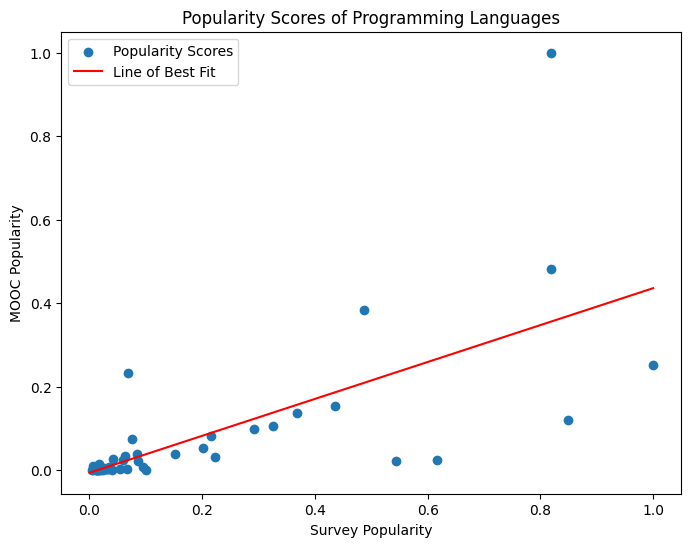

In [38]:
# Let's just take a look at what we have to start
plt.figure(figsize=(8, 6))
plt.scatter(language_popularity['survey'], language_popularity['mooc'], label='Popularity Scores')

# Let's also calculate a line of best fit
slope, intercept = np.polyfit(language_popularity['survey'], language_popularity['mooc'], 1)
x_values = np.linspace(0, 1, 2)
plt.plot(x_values, slope * x_values + intercept, color='red', label='Line of Best Fit')

plt.xlabel('Survey Popularity')
plt.ylabel('MOOC Popularity')
plt.title('Popularity Scores of Programming Languages')
plt.legend()


In [39]:
# The 'difference' column shows us how far from the line of best fit the points are. As a result, we can
# isolate the languages that are the most over-saturated or under-saturated relative to the others.

print('The most over-saturated:')
display(language_popularity.sort_values('difference', ascending=False).head())

print("The most under-saturated:")
display(language_popularity.sort_values('difference').head())

The most over-saturated:


,skill,mooc,survey,predicted,difference
5,Python,1.000000,0.819348,0.356269,0.643731
16,R,0.232394,0.069215,0.024793,0.207602
3,Java,0.384977,0.486477,0.209177,0.175800
12,SQL,0.481221,0.818361,0.355833,0.125388
15,Swift,0.075117,0.075456,0.027551,0.047567


The most under-saturated:


,skill,mooc,survey,predicted,difference
2,HTML,0.119718,0.848608,0.369198,-0.249480
6,TypeScript,0.025822,0.617465,0.267059,-0.241237
0,Bash,0.021127,0.544436,0.234788,-0.213661
4,JavaScript,0.251174,1.000000,0.436097,-0.184923
11,PowerShell,0.032864,0.222127,0.092363,-0.059499


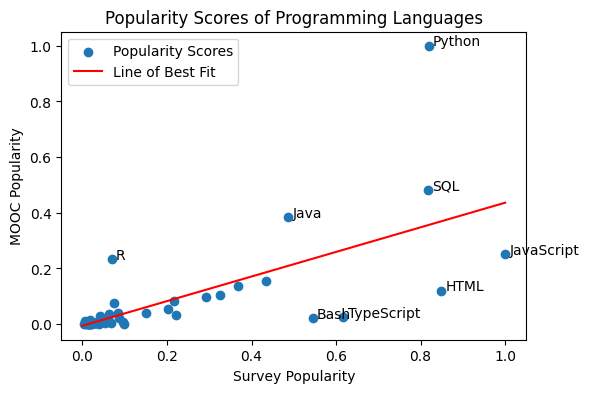

In [40]:
# Let's put all of this together onto a single chart.

def generate_chart(popularity_df, type, outlier_threshold):
    plt.figure(figsize=(6, 4))
    plt.scatter(popularity_df['survey'], popularity_df['mooc'], label='Popularity Scores')

    # Here's the line of best fit
    slope, intercept = np.polyfit(popularity_df['survey'], popularity_df['mooc'], 1)
    x_values = np.linspace(0, 1, 100)
    plt.plot(x_values, slope * x_values + intercept, color='red', label='Line of Best Fit')

    # Let's also annotate the outliers.
    for _,row in popularity_df[popularity_df['difference'].abs() > outlier_threshold].iterrows():
        plt.annotate(row['skill'], (row['survey']+.01, row['mooc']))

    plt.xlabel('Survey Popularity')
    plt.ylabel('MOOC Popularity')
    plt.title(f'Popularity Scores of {type}')
    plt.legend()

generate_chart(language_popularity, 'Programming Languages', 0.1)

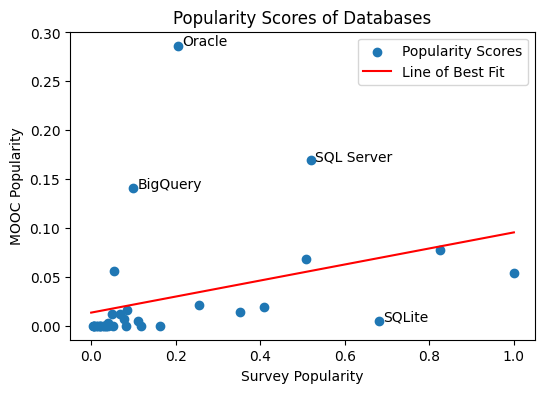

In [41]:
database_popularity = generate_popularity_df(databases, 'DatabasesUsedPastYear')
generate_chart(database_popularity, 'Databases', 0.05)

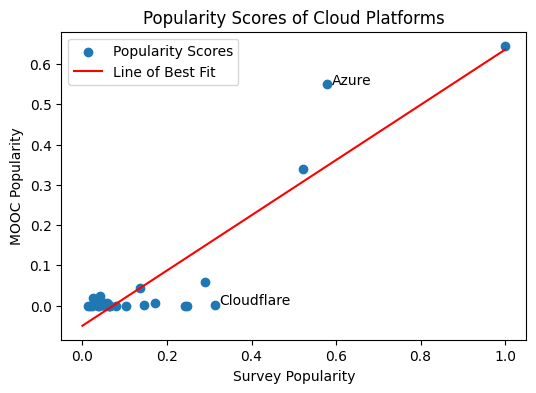

In [42]:
platform_popularity = generate_popularity_df(platforms, 'CloudPlatformsUsedPastYear')
generate_chart(platform_popularity, 'Cloud Platforms', 0.15)

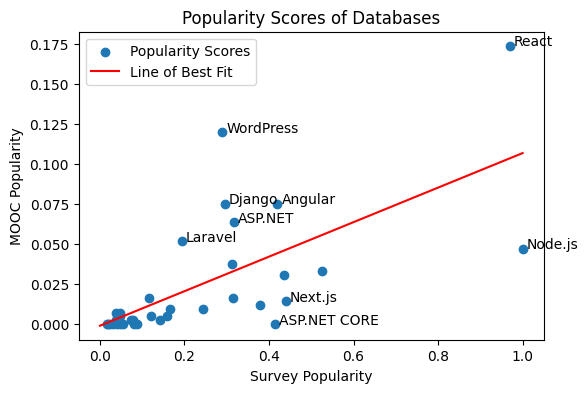

In [43]:
framework_popularity = generate_popularity_df(frameworks, 'WebFrameworksUsedPastYear')
generate_chart(framework_popularity, 'Databases', 0.03)

### Conclusion

Insights:
1. There are many skills that appear to be relatively over-saturated in MOOC education. 
However, these skills are likely still very valuable to learn even if they are not used in industry to the 
same extent. For example, Python is a common first language to learn when learning to code, but then students 
might switch to a language that is more specific to their work once they've secured a job.
2. There are also many skills that appear to be relatively under-saturated in MOOCs. These theoretically
represent skills with higher demand than the available MOOC content suggests. However, additional investigation
is necessary before that conclusion is fully supported (see additional investigation #3).

Additional investigation:
1. We used a random subset of MOOC data from Udemy in this analysis to prevent oversaturating the MOOC dataset 
with Udemy data. Repeating this analysis with a larger Udemy dataset, or at least different random subsets,
would be beneficial for validating repeatable results.
2. Investigate if there is a correlation between the saturation level of a skill and the salary of the skill
in industry. For example, since Python is over-saturated in MOOC content, does that mean there are more Python
programmers available, and therefore Python programmers are likely to have lower compensation?
3. Investigate other ways of identifying the skills in MOOCs that are more accurate than searching course titles. 
For example, many web frameworks like React or Angular with use JavaScript, TypeScript, and HTML. If the course
title contained "Angular" but not the foundational skills of "JavaScript", "TypeScript", or "HTML", then we 
could end up with the foundational skills showing as under-represented in our results. 